In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
plt.style.use('seaborn')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ericadsetts/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ericadsetts/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ericadsetts/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('judge-1377884607_tweet_product_company_v2-clean.csv')

In [3]:
len(df)

9093

In [4]:
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
df.dropna(subset = ['tweet_text'], inplace = True)

In [7]:
df[df.is_there_an_emotion_directed_at_a_brand_or_product == 'I can\'t tell'] = np.NaN

In [8]:
df.dropna(subset = ['is_there_an_emotion_directed_at_a_brand_or_product'], inplace = True)

In [9]:
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               942
Apple                              659
iPad or iPhone App                 470
Google                             429
iPhone                             296
Other Google product or service    292
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

<AxesSubplot:title={'center':'Products'}>

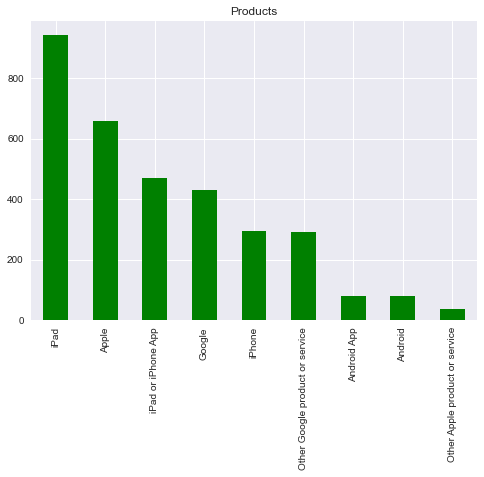

In [10]:
df.emotion_in_tweet_is_directed_at.value_counts().plot(kind = 'bar', color = 'green', title = 'Products')

In [11]:
def add_company(product):
    if product in ['iPad', 'Apple', 'iPad or iPhone App', 'iPhone', 'Other Apple product or service']:
        return 'Apple'
    elif product in ['Google', 'Other Google product or service', 'Android App', 'Android']:
        return 'Google'
    else:
        return np.NaN

In [12]:
df['company'] = df.emotion_in_tweet_is_directed_at.map(add_company)

In [13]:
df.emotion_in_tweet_is_directed_at.isna().sum()

5654

In [14]:
df.head(100)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google
...,...,...,...,...
97,"Yes!!! RT @mention hey @mention , i've got ano...",NaN,No emotion toward brand or product,NaN
98,"Fast, Fun &amp; Future: @mention of Google pre...",Google,Positive emotion,Google
99,GSD&amp;M &amp; Google's Industry Party Tonigh...,NaN,No emotion toward brand or product,NaN
100,New buzz? &quot;@mention Google to Launch Majo...,NaN,No emotion toward brand or product,NaN


In [15]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

<AxesSubplot:title={'center':'Emotions'}>

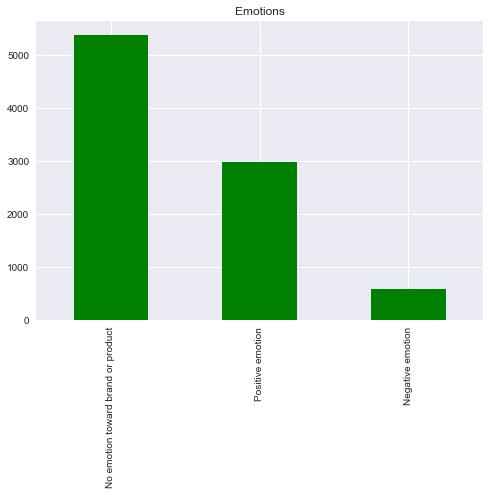

In [16]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().plot(kind = 'bar', color = 'green', title = 'Emotions')

In [17]:
df.groupby(['emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']).count()

tweet_text  \
emotion_in_tweet_is_directed_at is_there_an_emotion_directed_at_a_brand_or_product               
Android                         Negative emotion                                             8   
                                No emotion toward brand or product                           1   
                                Positive emotion                                            69   
Android App                     Negative emotion                                             8   
                                No emotion toward brand or product                           1   
                                Positive emotion                                            72   
Apple                           Negative emotion                                            95   
                                No emotion toward brand or product                          21   
                                Positive emotion                                           543   
Google                          Negative emotion                                            68   
                                No emotion toward brand or product                          15   
                                Positive emotion                                           346   
Other Apple product or service  Negative emotion                                             2   
                                No emotion toward brand or product                           1   
                                Positive emotion                                            32   
Other Google product or service Negative emotion                                            47   
                                No emotion toward brand or product                           9   
                                Positive emotion                                           236   
iPad                            Negative emotion                                           125   
                                No emotion toward brand or product                          24   
                                Positive emotion                                           793   
iPad or iPhone App              Negative emotion                                            63   
                                No emotion toward brand or product                          10   
                                Positive emotion                                           397   
iPhone                          Negative emotion                                           103   
                                No emotion toward brand or product                           9   
                                Positive emotion                                           184   

                                                                                    company  
emotion_in_tweet_is_directed_at is_there_an_emotion_directed_at_a_brand_or_product           
Android                         Negative emotion                                          8  
                                No emotion toward brand or product                        1  
                                Positive emotion                                         69  
Android App                     Negative emotion                                          8  
                                No emotion toward brand or product                        1  
                                Positive emotion                                         72  
Apple                           Negative emotion                                         95  
                                No emotion toward brand or product                       21  
                                Positive emotion                                        543  
Google                          Negative emotion                                         68  
                                No emotion toward brand or product                       15  
                   

Text(0.5, 0, 'Emotion Directed at')

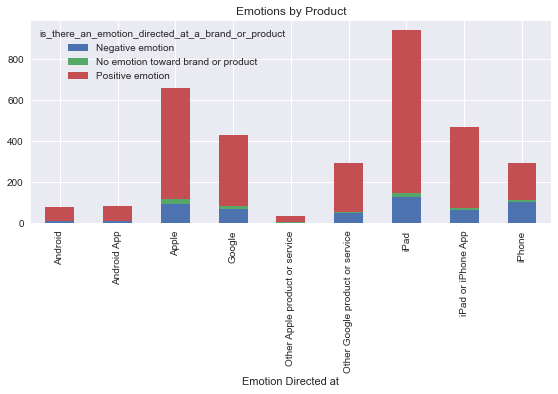

In [18]:
df.groupby(['emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']).tweet_text.count().unstack().plot(kind = 'bar', stacked = True, figsize = (9.32,3.72), title = 'Emotions by Product')
plt.xlabel('Emotion Directed at')

In [19]:
df.groupby(['company', 'is_there_an_emotion_directed_at_a_brand_or_product']).count()

tweet_text  \
company is_there_an_emotion_directed_at_a_brand_or_product               
Apple   Negative emotion                                           388   
        No emotion toward brand or product                          65   
        Positive emotion                                          1949   
Google  Negative emotion                                           131   
        No emotion toward brand or product                          26   
        Positive emotion                                           723   

                                                            emotion_in_tweet_is_directed_at  
company is_there_an_emotion_directed_at_a_brand_or_product                                   
Apple   Negative emotion                                                                388  
        No emotion toward brand or product                                               65  
        Positive emotion                                                               1949  
Google  Negative emotion                                                                131  
        No emotion toward brand or product                                               26  
        Positive emotion                                                                723

Text(0.5, 0, 'Company')

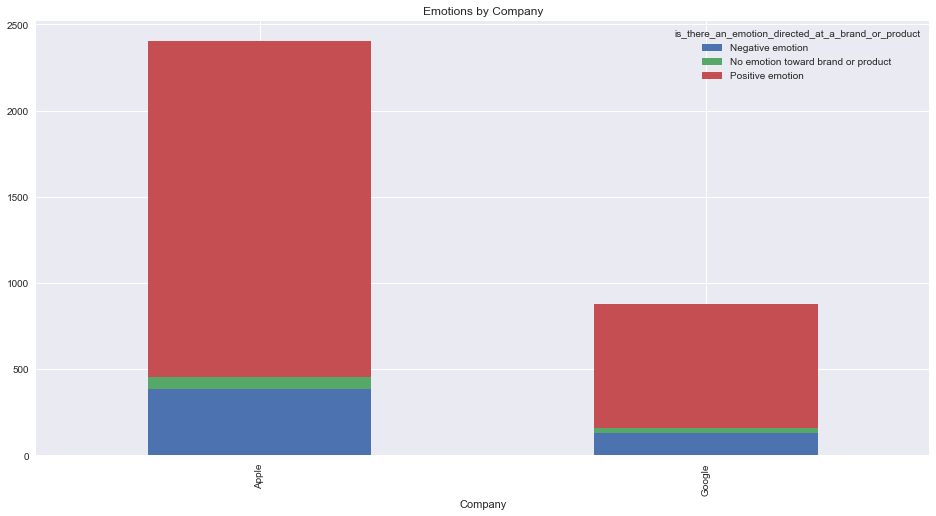

In [20]:
df.groupby(['company', 'is_there_an_emotion_directed_at_a_brand_or_product']).tweet_text.count().unstack().plot(kind = 'bar', stacked = True, figsize = (16,8), title = 'Emotions by Company')
plt.xlabel( 'Company')

In [37]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',
            'said', 'one', 'com', '-', '–', '—', 'sxsw', 'mention', 'link', 'ipad', 'iphone',
           'google', 'apple']
sw_set = set(sw_list)

def process_tweet(tweet):
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed
df_tweets = df.tweet_text
df_tweets = df_tweets.apply(process_tweet)
sw_set

{'!',
 '"',
 '""',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '...',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'apple',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'com',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'google',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'ipad',
 'iphone',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'link',
 'll',
 'm',
 'ma',
 'me',
 

In [38]:
df_freq_neg = df[df['is_there_an_emotion_directed_at_a_brand_or_product']=='Negative emotion']
df_freq_pos = df[df['is_there_an_emotion_directed_at_a_brand_or_product']=='Positive emotion']
df_freq_neu = df[df['is_there_an_emotion_directed_at_a_brand_or_product']=='No emotion toward brand or product']

In [39]:
data_neg = df_freq_neg['tweet_text']
data_pos = df_freq_pos['tweet_text']
data_neu = df_freq_neu['tweet_text']

In [40]:
pros_neg = list(map(process_tweet, data_neg))
pros_pos = list(map(process_tweet, data_pos))
pros_neu = list(map(process_tweet, data_neu))

In [41]:
flat_neg = [item for sublist in pros_neg for item in sublist]
flat_pos = [item for sublist in pros_pos for item in sublist]
flat_neu = [item for sublist in pros_neu for item in sublist]

In [42]:
neg_freq = FreqDist(flat_neg)
pos_freq = FreqDist(flat_pos)
neu_freq = FreqDist(flat_neu)

In [43]:
pos_freq.most_common(20)

[('rt', 937),
 ('store', 542),
 ("'s", 493),
 ('2', 490),
 ('quot', 464),
 ('app', 396),
 ('new', 359),
 ('austin', 294),
 ('amp', 211),
 ('ipad2', 209),
 ('android', 198),
 ('launch', 160),
 ('get', 157),
 ("n't", 152),
 ('pop-up', 151),
 ('great', 137),
 ('party', 132),
 ('line', 130),
 ('time', 128),
 ('free', 125)]

In [44]:
neg_freq.most_common(20)

[('quot', 175),
 ('rt', 137),
 ("n't", 87),
 ("'s", 77),
 ('2', 64),
 ('app', 60),
 ('store', 46),
 ('new', 43),
 ('like', 39),
 ('circles', 34),
 ('social', 31),
 ('apps', 30),
 ('people', 29),
 ('design', 28),
 ('need', 25),
 ('android', 24),
 ('austin', 24),
 ('get', 24),
 ('amp', 22),
 ('launch', 22)]